# Análisis exploratorio

El objetivo de este notebook es entender los datos que tenemos a disposición con un análisis descriptivo de los mismos. Resulta imprescindible entender los datos que tenemos si queremos obtener los mejores resultados. En general, seguir estos pasos nos ayudará a entender nuestros datos:

1. Echa un vistazo a tus datos originales
2. Revisa las dimensiones del dataset
3. Identifica los tipos de datos de los atributos de tu dataset
4. Resume la distribución de las instancias de las clases en tu dataset
5. Intenta entender tus datos mediante el análisis descriptivo
6. Entiende las relaciones en tus datos mediante las correlaciones
7. Revisa la inclinación (skew) de las distribuciones de cada atributo


## Información sobre el dataset: Pima Indians

El dataset Pima Indians incluye registros médicos de Pima Indians con datos de pacientes que tendrán diabetes durante los próximos 5 años.
Por lo tanto, se trata de un problema de clasificación. Se trata de un buen ejemplo de dataset, ya que todos los atributos de entrada son numéricos y la variable de salida es binaria (0 o 1). El dataset es público y se puede descargar desde el repositorio UCI Machine Learning Repository.

In [1]:

from pandas import read_csv
filename = "../data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = read_csv(filename, names = names)

peek = data.head(20) #visualizamos los primeros 20 registros de nuestro dataset
print(peek)

# Ya estamos trabajando con un DataFrame. La primera columna contiene el índice de las filas, el cual sirve de ayuda a la hora referenciar una observación específica

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

## Dimensionalidad de los datos

Hay que tener muy claro cuántos datos tenemos, tanto en términos de columnas como filas

 - Si tenemos muchas filas, hay algoritmos que tardarán en entrenar. En cambio, si tenemos pocas filas, quizá no las podamos entrenar.
 - Si tenemos demasiados atributos, podemos crear modelos muy pobres o que sufran dada la dimensionalidad del dataset.
 
Podemos imprimir las dimensioens del dataset utilizando la propiedad *shape* del DataFrame de Pandas

In [2]:
print(data.shape)



(768, 9)


## Tipos de datos de cada atributo

Verificar los tipos de atributos que tenemos es muy importante. Puede que tengamos que convertir strings a floats o integers a variables categóricas. Podemos obtener una idea de los datos revisando las primeras filas de los datos originales, tal como se ha hecho en el primer paso. También podemos listar los tipos de datos usados por el dataframe para caracterizar cada atributo utilizando la propiedad *dtypes*

In [3]:
print(data.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


## Análisis descriptivo

El análisis descriptivo puede darnos un enfoque sobre la distribución o forma de cada atributo. Normalmente, se podrán generar tantos resumenes que no los podremos gestionar con el tiempo que tenemos. Para ver un pequeño resumen de los datos, podemos utilizar la función *describe()* del DataFrame de Pandas, el cual nos da 8 propiedades estadísticas de cada atributo:

 - Conteo
 - Media
 - Desviación estándar
 - Valor mínimo
 - Percentil 25
 - Percentil 75
 - Valor máximo
 
Conviene revisar bien estos resumenes, ya que nos podrán indicar si tenemos datos faltantes, NA (null) o distribuciones de datos poco comunes.


In [4]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)  # podemos utilizar esta función para formatear la precisión de los números
description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


## Distribución de las clases (para clasificación)

En un problema de clasificación, debemos saber cómo de balanceados están los datos. Los problemas altamente desbalanceados son comunes y requieren un tratamiento especial de los datos.

In [5]:
count_class = data.groupby("class").size()
print(count_class)

class
0    500
1    268
dtype: int64


Podemos apreciar que casi tenemos el doble de pacientes sin diabetes. Estaríamos ante un problema de balanceo de datos.

## Correlación entre atributos

La función *corr()* del DataFrame de Pandas nos calcula la correlación entre atributos. La matriz nos da la correlación entre todos los pares de atributos (dos veces, ya que la matriz es simétrica). Se puede ver que la diagonal (de izquierda a derecha) de la matriz muestra una perfecta correlación (pearson = 1) entre el propio atributo:

In [6]:
correlations = data.corr()
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


# Análisis de los datos mediante visualización

Cuanto mejor entendamos los datos, obtendremos un mejor resultado de los algoritmos de ML.

## Plots univariables

En esta sección veremos 3 técnicas que se pueden usar para entender cada atributos del dataset de forma independiente:
    1. Histogramas
    2. Plots de densidad
    3. Plots Box and Whisker
    
### Histogramas

Una forma rápida de obtener una idea de la distribución de un atributo es plotearlos mediante histogramas. Los histogramas agrupan los datos en barras y ofrecen un conteo de las observaciones por cada barra. Con la forma de cada barra podemos deduciar rápidamente si el atributo tiene una distribución **Gaussiana**, si está la distribución está **inclinada** o incluso si tiene una distribución exponencial. Asimismo, nos puede aydar a ver posibles **outliers o valores atípicos**.
    

<IPython.core.display.Javascript object>


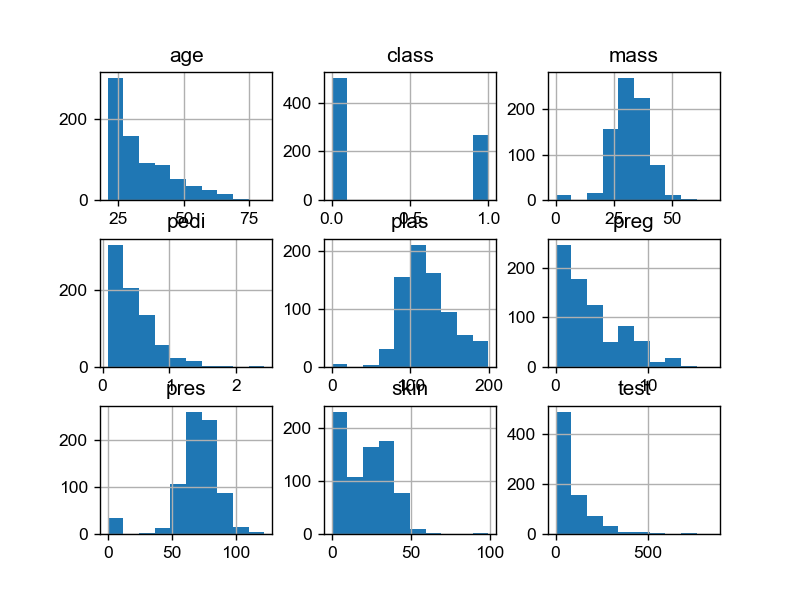

In [7]:
%matplotlib notebook  #lo utilizamos para indicar que tiene que renderizar las gráficas en un notebook. Podéis probar a ignorar esta línea y ver el resultado
import matplotlib.pyplot as plt
from pandas import read_csv
filename = '../data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.hist()
plt.show()

Podemos mejorar las visualizaciones practicamente hasta donde queramos, incluyendo nuevos parametros, utilizando la libreria seaborn, plotly... Pero ahora nos centraremos en obtener información de nuestro dataset. Os dejo un ejemplo de una visualización más vistosa del mismo dataset:

<IPython.core.display.Javascript object>


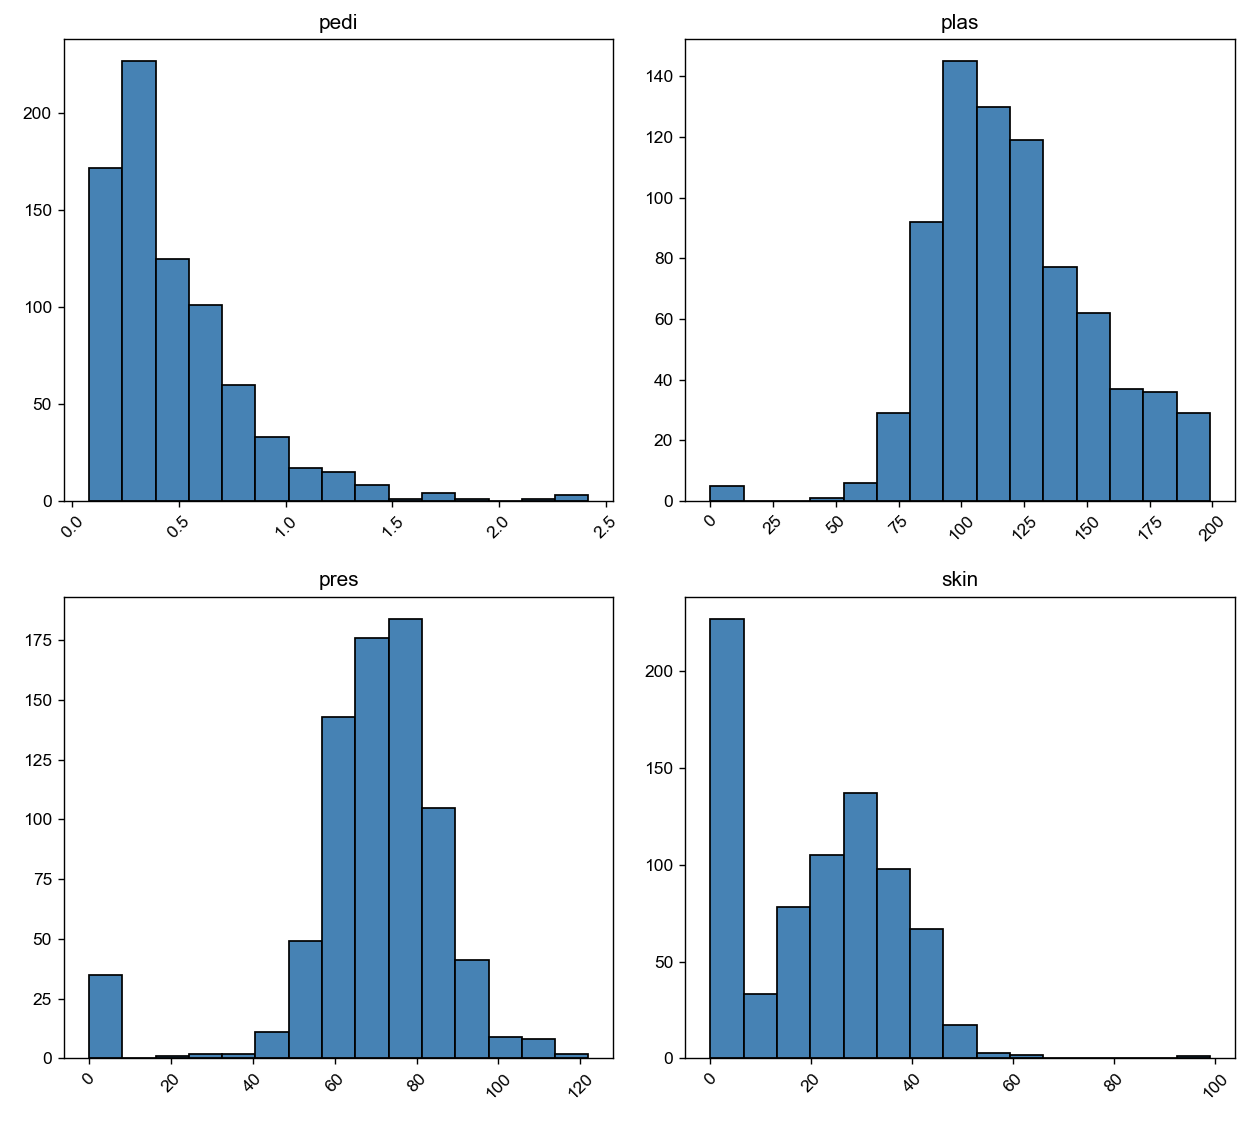

In [8]:
fig = data.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

Se puede observar que los atributos *age, pedi* y *test* pueden tener una distribución exponencial. También se puede ver que *mass, pres* y *plas* tienen una **distribución casi Gaussiana**. Este último dato es importante, ya que muchos algoritmos de ML asumen que las variables de entrada (viéndolas independientemente) tienen una distribución Gaussiana.

### Gráficas de densidad

Estas gráficas son otra alternativa para visualizar la distribución de cada atributo.

<IPython.core.display.Javascript object>


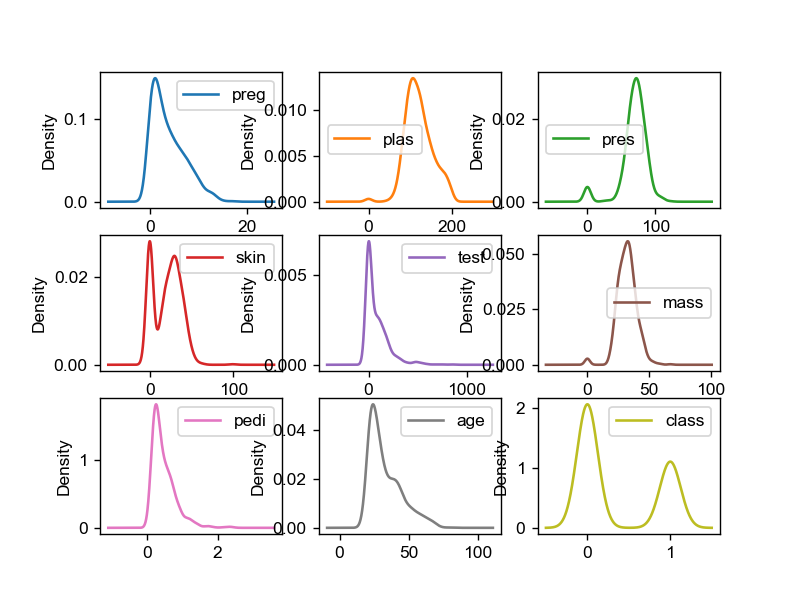

In [9]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

### Gráficas Box y Whisker

Un boxplot resume la distribución de cada atributo, marcando la **mediana** mediante una línea y una caja entre los **percentiles 25 y 75**. En cuanto a las gráficas Whisker, nos dan una idea de la dispersión de los datos y los "puntos" fuera de los whiskers pueden ayudar a detectar outliers o puntos atípicos.

<IPython.core.display.Javascript object>


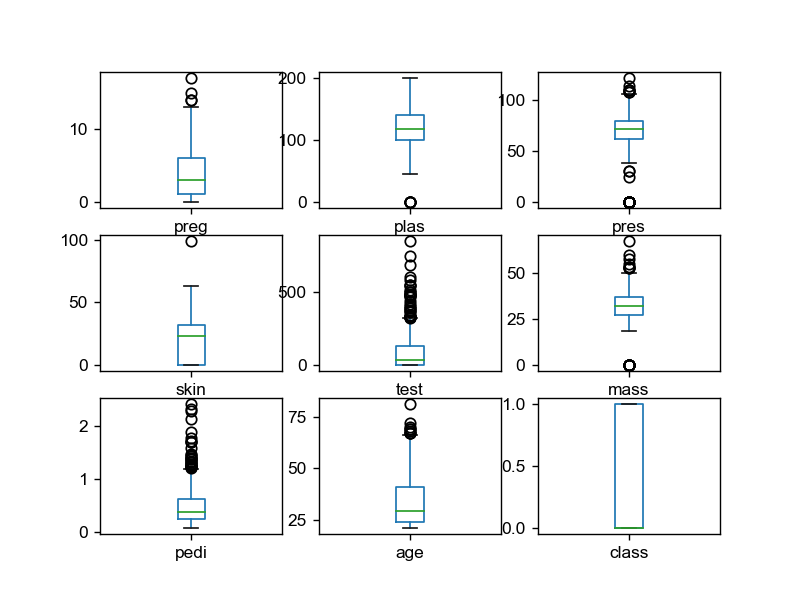

In [11]:
#alternativa con seaborn
#import seaborn as sns
#sns.set(style="whitegrid")
#ax = sns.boxplot(data = data)

data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

La dispersión es bastante diferente en los atributos. Atributos como age, test, y skin parecen estar inclinados hacia valores más pequeños

## Gráficas multivariable

Los plots más comunes para visualizar interacciones entre múltiples variables son:
     - Gráfica de matriz de correlaciones
     - Matriz de  gráfica dispersión (Scatter Plot Matrix)

### Gráfica de matriz de correlaciones

La correlación nos indica como se relacionan dos variables entre sí. Si las dos variables cambián en la misma dirección, estarán relacionadas positivamente. Si cambian en direcciones opuestas (una tiende hacia arriba, otra hacia abajo), estarán correlacionadas negativamente. Las relaciones entre pares de variables se pueden representar en una matriz, y después graficarlas.

Es importante buscar correlaciones entre variables, ya que algunos algoritmos (por ejemplo: **regresión linear y logística**) tienen un **rendimiento muy bajo si trabajan con variables que están correlacionadas**.

<IPython.core.display.Javascript object>


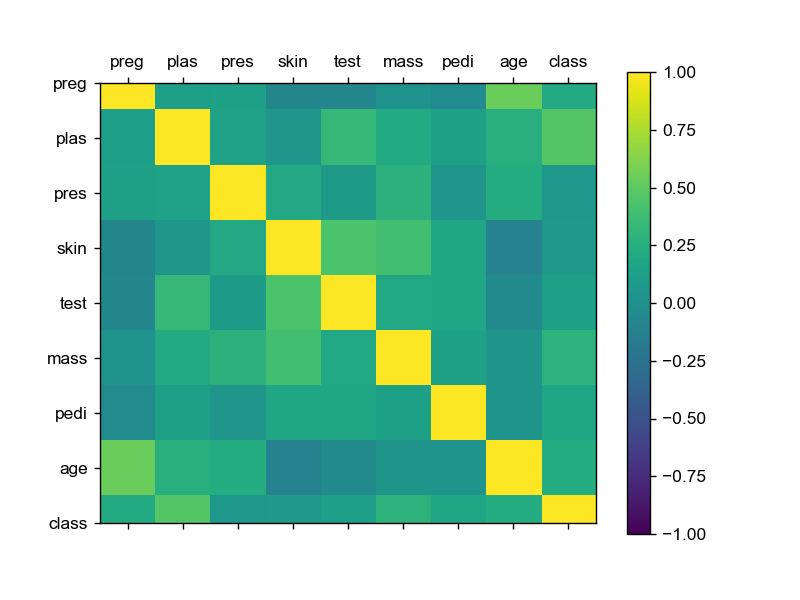

In [22]:
from matplotlib import pyplot
from pandas import read_csv
import numpy

correlations = data.corr()
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)

ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
fig.colorbar(cax)
pyplot.show()

<IPython.core.display.Javascript object>


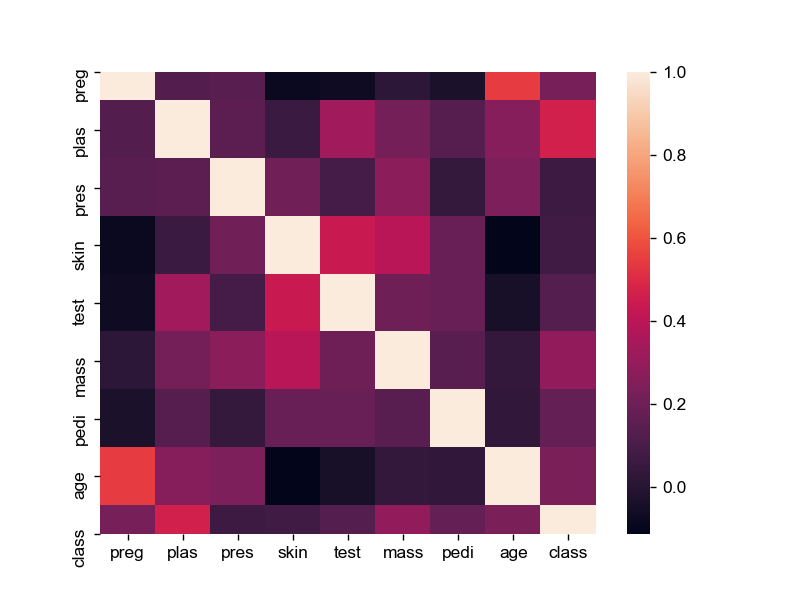

In [21]:
import seaborn as sns

plt.clf()
fig = pyplot.figure()
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

### Matriz de gráficas de dispersión

Cada Scatter Plot o Gráfica de Dispersión muestra la relación entre dos variables medinate puntos en dos dimensiones, un eje por cada atributo. Estas gráficas pueden ayudar a detectar relaciones estructuradas entre variables. Estos atributos estructurados, pueden estar correlacionados y pueden ser buenos candidatos a eliminar de tu dataset.

<IPython.core.display.Javascript object>


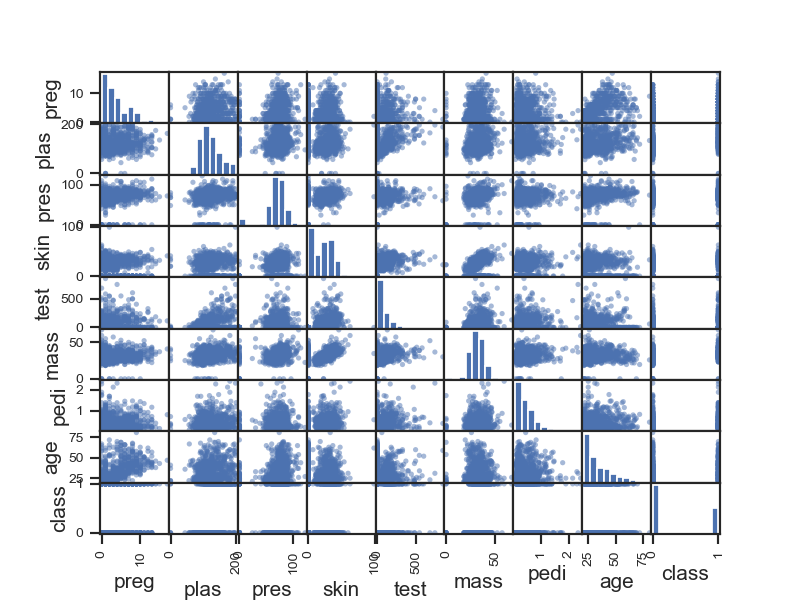

In [28]:
from pandas.plotting import scatter_matrix

scatter_matrix(data)
plt.show()

<IPython.core.display.Javascript object>


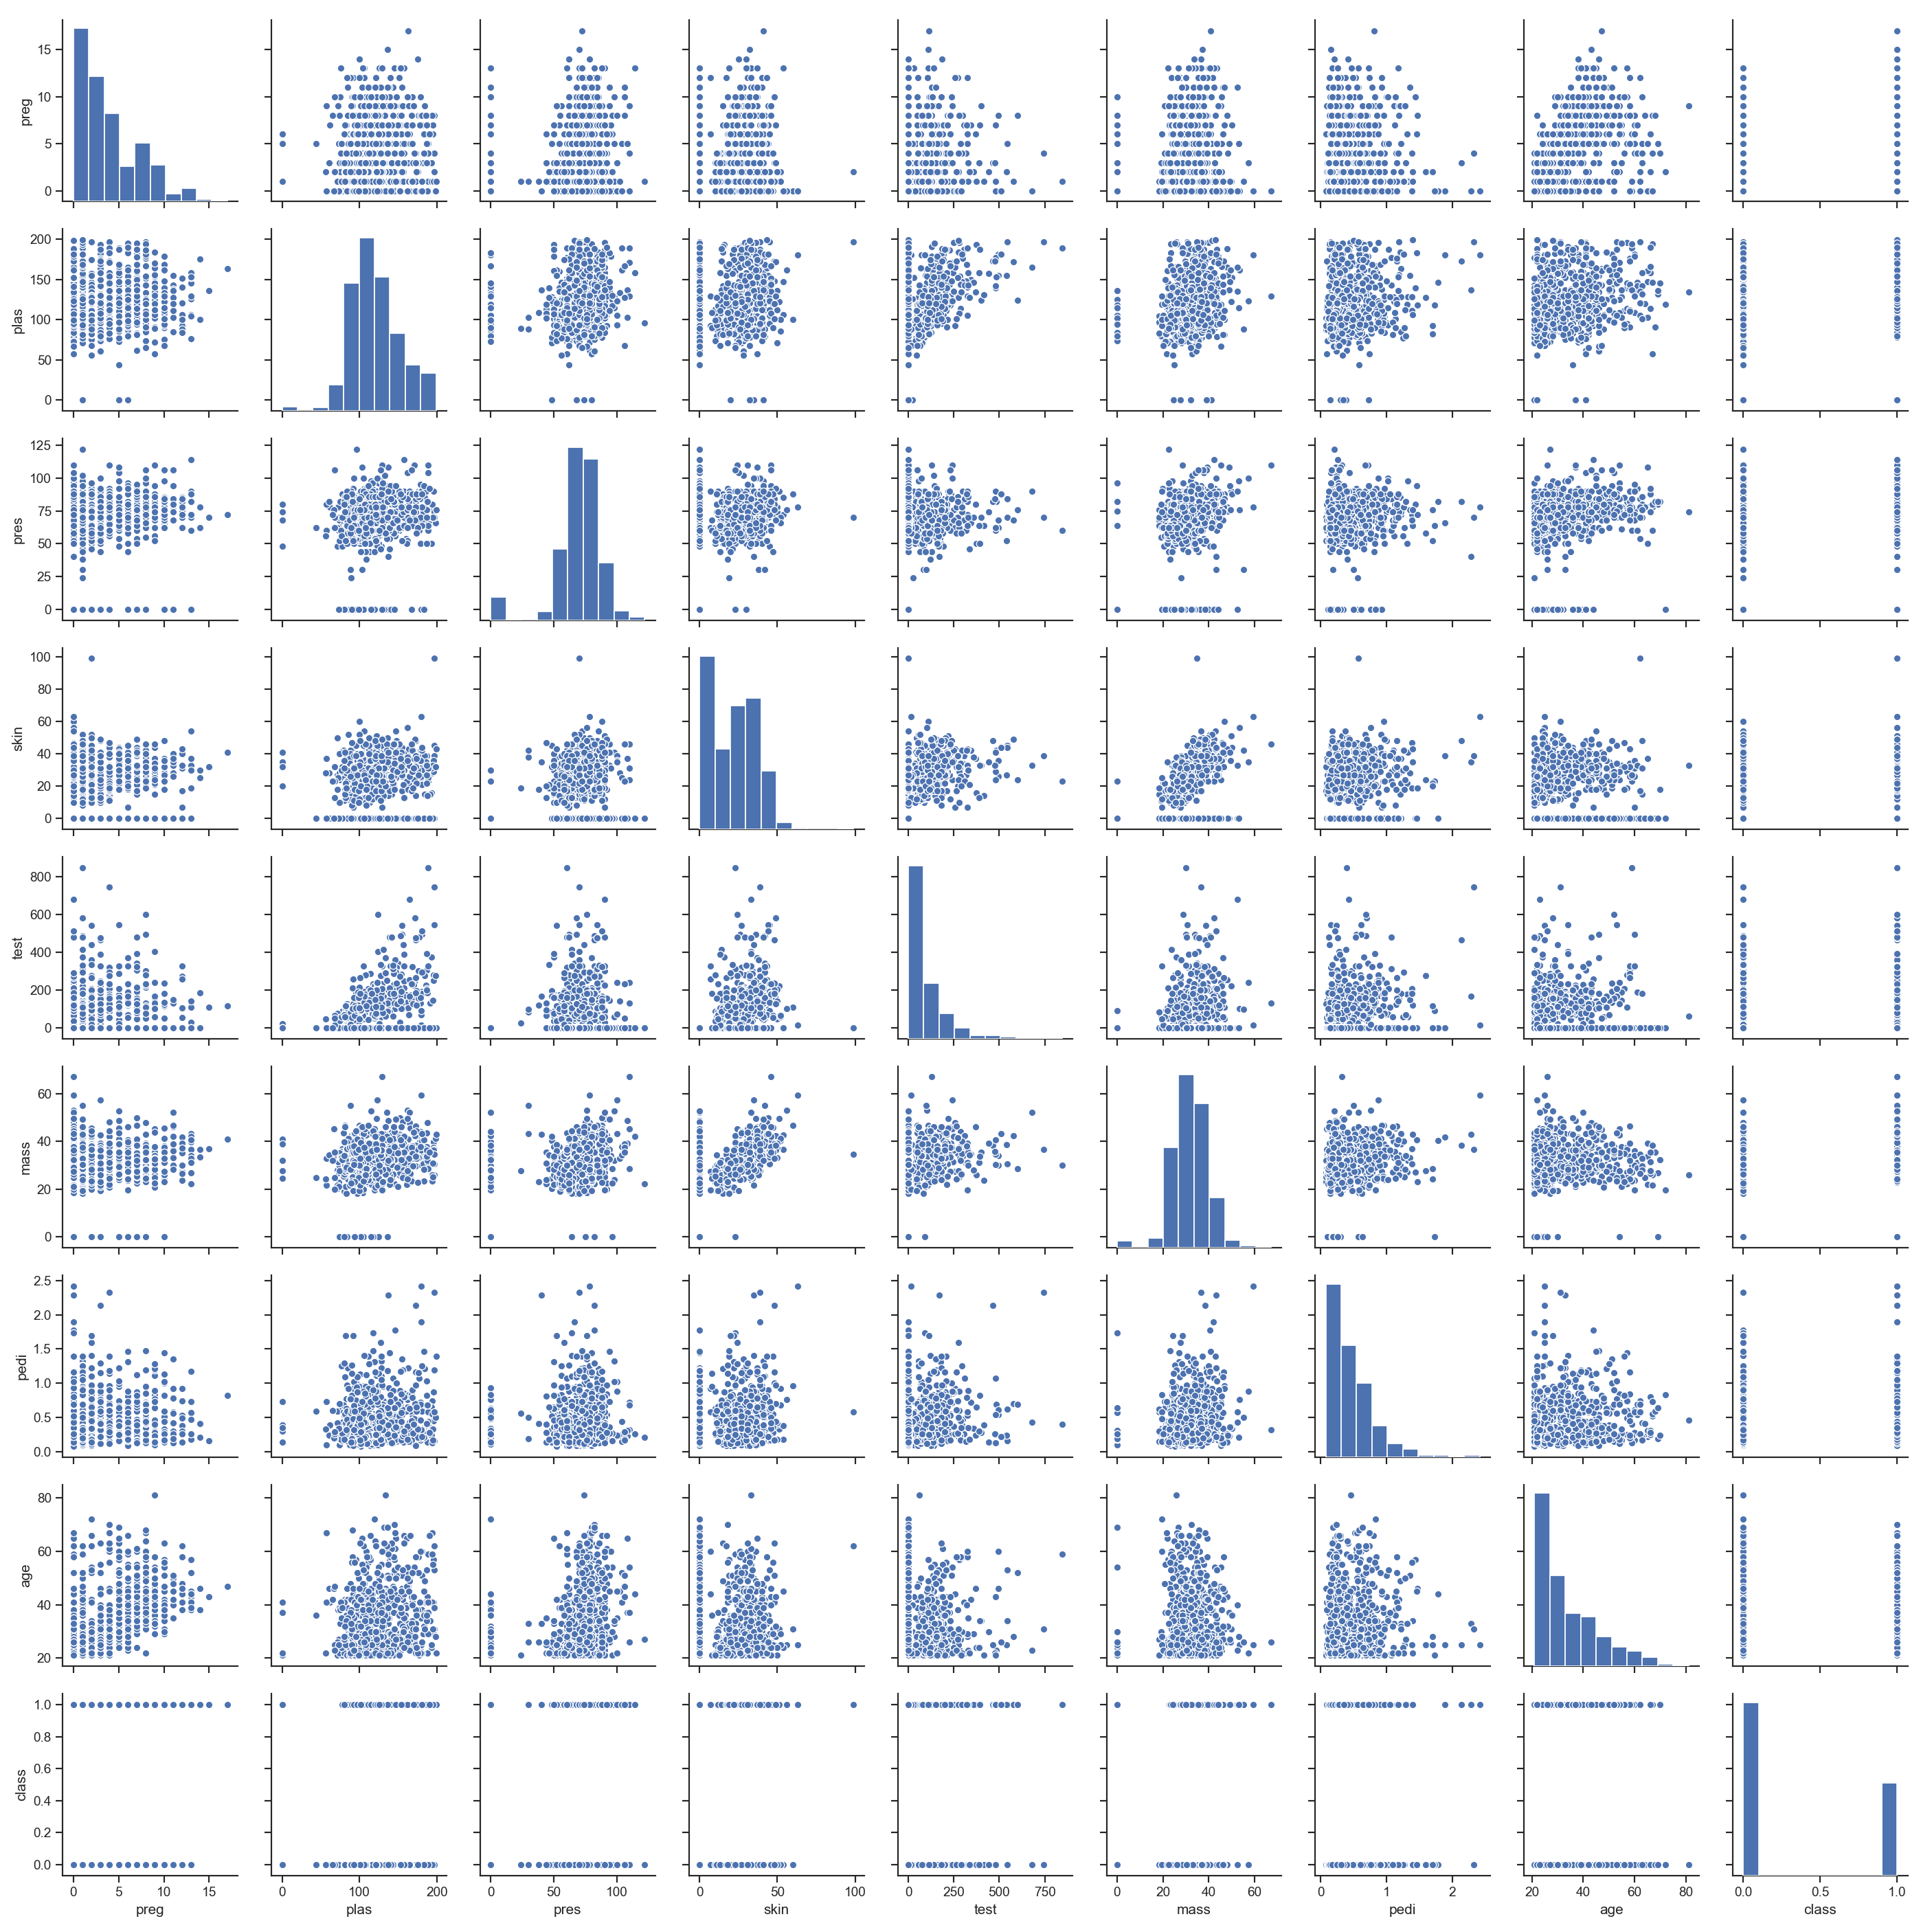

In [26]:
import seaborn as sns
sns.set(style="ticks")


sns.pairplot(data)